
 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

 Missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Mi

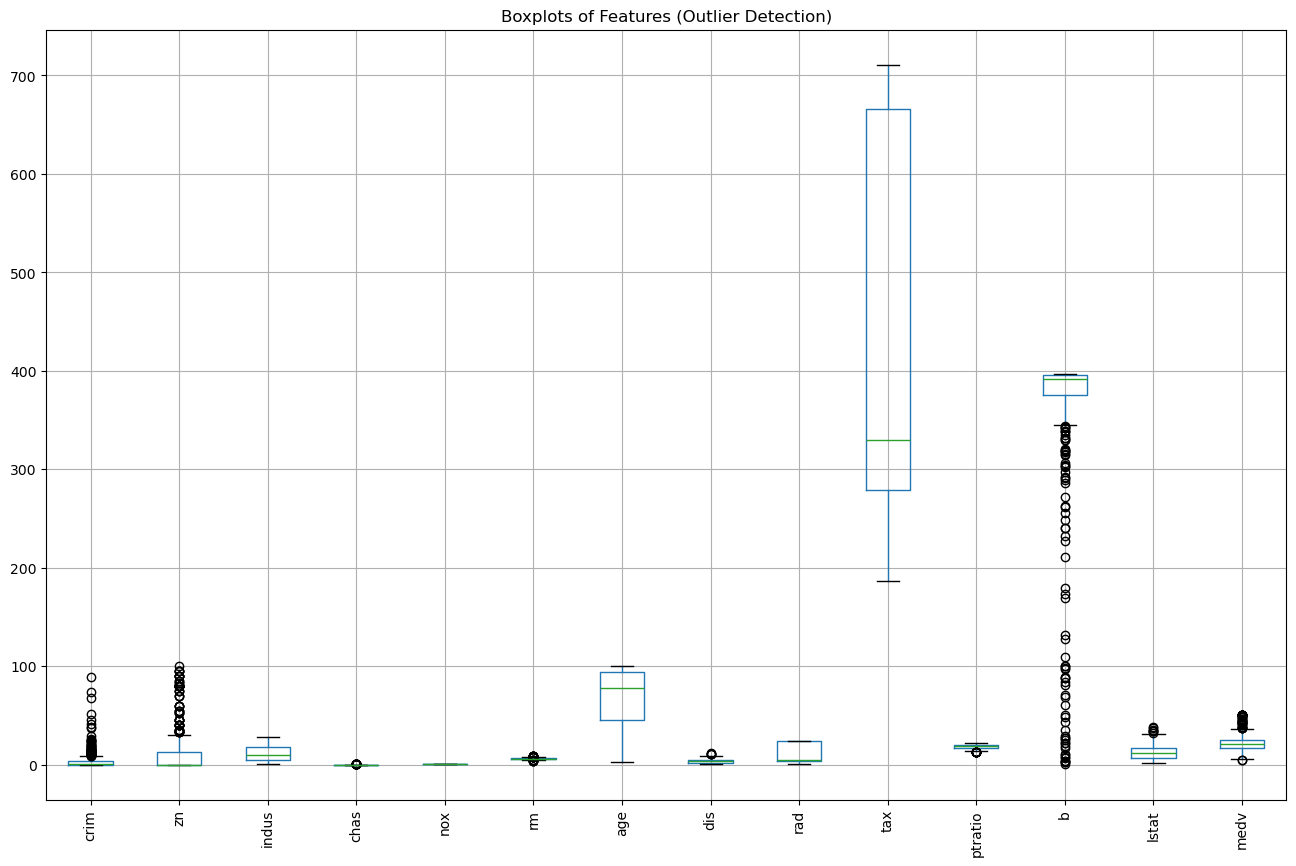


 Data Types:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

📏 Scaled Data (first 5 rows):
        crim    zn     indus  chas       nox        rm       age       dis  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        rad       tax   ptratio         b     lstat      medv  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104

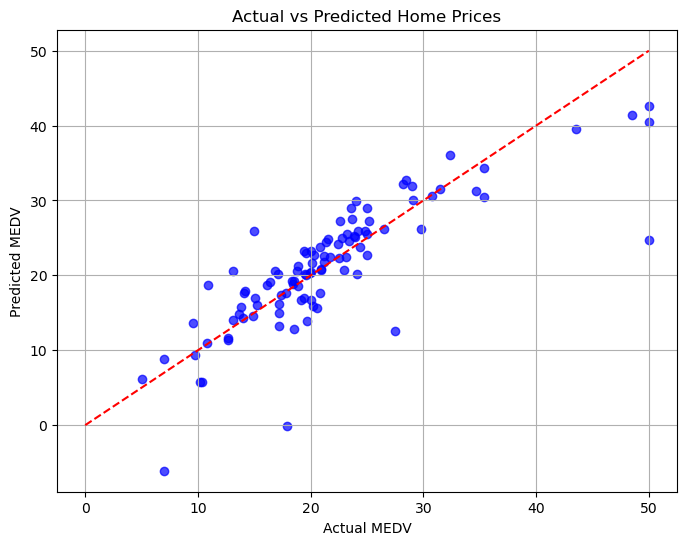

In [4]:
# ---------------------------------------------
# 4. Data Analytics I
# Problem Statement:
# Create a Linear Regression Model using Python to predict home prices
# using the Boston Housing Dataset. This dataset contains information 
# about various houses in Boston with 506 samples and 14 feature variables.
# ---------------------------------------------

# Step 1: Import Required Libraries
import pandas as pd                     # For data handling and analysis
import numpy as np                      # For numerical operations
from sklearn.datasets import fetch_openml  # For accessing datasets (not used here)
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.linear_model import LinearRegression      # Linear Regression algorithm
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate model performance
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling
import matplotlib.pyplot as plt         # For plotting graphs
import seaborn as sns                   # For visualizations

# Step 2: Load and Inspect Dataset
df = pd.read_csv("BostonHousing.csv")   # Load the Boston Housing dataset from CSV

# Step 3: Display Basic Info About Dataset
print("\n Data Info:")
print(df.info())                        # Show data types, non-null values, etc.

# Step 4: Check for Missing Values
print("\n Missing values:\n", df.isnull().sum())  # Check for missing values in each column

# Step 5: Handle Missing Values
df.fillna(df.mean(), inplace=True)     # Fill missing values with column mean

# Optionally: Use KNNImputer instead of mean (commented)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 6: Confirm Missing Values Handled
print("\nMissing values after handling:")
print(df.isnull().sum())                # Should show 0 for all columns

# Step 7: View Descriptive Statistics
print("\n Descriptive statistics:\n", df.describe())  # Get summary statistics for each feature

# Step 8: Outlier Detection Using Boxplot
plt.figure(figsize=(16, 10))
df.boxplot(rot=90)                      # Generate boxplots for all features
plt.title("Boxplots of Features (Outlier Detection)")
plt.show()

# Step 9: Check Data Types
print("\n Data Types:\n", df.dtypes)    # Confirm all features are in correct format

# Step 10: Feature Scaling (Min-Max Normalization)
scaler = MinMaxScaler()                 # Initialize MinMaxScaler (scales data between 0 and 1)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)  # Apply scaler to all columns
print("\n📏 Scaled Data (first 5 rows):\n", df_scaled.head())  # View first 5 rows of scaled data

# Step 11: Preprocessing - Check for Missing Again
print(df.isnull().sum())               # Final check for missing values (should be 0)

# Step 12: Split Features and Target Variable
X = df.drop('medv', axis=1)            # Independent variables (all except 'medv')
y = df['medv']                         # Dependent variable (target: Median value of owner-occupied homes)

# Step 13: Standardize the Features (Z-score scaling)
scaler = StandardScaler()             # Initialize standard scaler
X_scaled = scaler.fit_transform(X)    # Scale features to have mean = 0 and std = 1

# Step 14: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 15: Train Linear Regression Model
model = LinearRegression()            # Initialize Linear Regression model
model.fit(X_train, y_train)           # Train model using training data

# Step 16: Model Evaluation
y_pred = model.predict(X_test)        # Predict target values for test set
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)             # Calculate R² Score (Coefficient of Determination)

# Step 17: Print Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 18: Visualize Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')  # Plot actual vs predicted values
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Home Prices")
plt.plot([0, 50], [0, 50], color='red', linestyle='--')  # Identity line (ideal prediction)
plt.grid(True)
plt.show()
